[ scale parameter = 0.1 ]
1) acceptance ratio: 0.7277
2) 자기상관함수 도표: 첫 번째 그림
3) 상관시간: 641.8219186218723

[ scale parameter = 0.5 ]
1) acceptance ratio: 0.6887
2) 자기상관함수 도표: 첫 번째 그림
3) 상관시간: 8.230749563985265

[ scale parameter = 100 ]
1) acceptance ratio: 0.0124
2) 자기상관함수 도표: 첫 번째 그림
3) 상관시간: 72.14035240068615



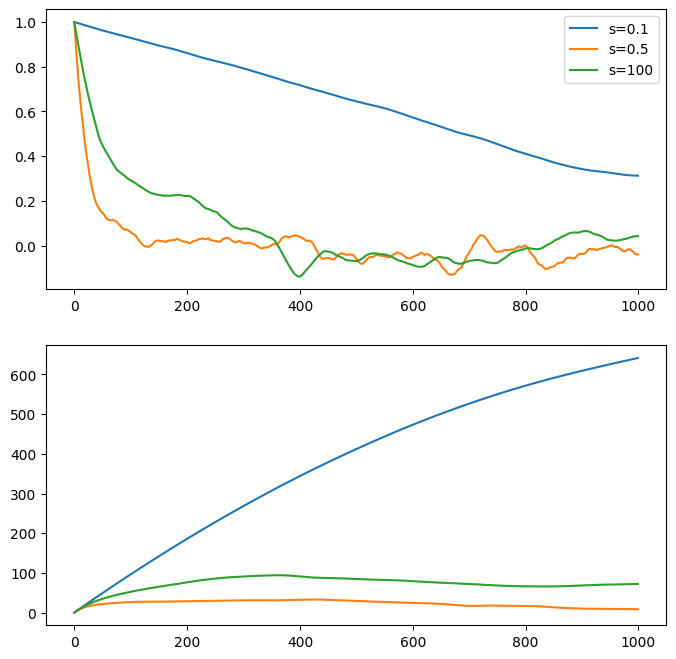

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series

# 목표 분포: 평균이 0이고 분산이 1인 정규분포
def p(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

# 제안 분포: 위치 모수 m과 척도 모수 s를 가진 극한값 분포 (Gumbel 분포)
def q(x, m, s):
    return 1/s*np.exp(-(x-m)/s)*np.exp(-np.exp(-(x-m)/s))

T = 10000  # 시뮬레이션 횟수
x = 5  # 초기값
s_values = [0.1, 0.5, 100]  # 다양한 척도 모수 s 값들

# 그래프 출력을 위한 subplot 생성
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# 각 s 값에 대해 반복
for s in s_values:
    print(f'[ scale parameter = {s} ]')

    xlist = []  # MCMC에서 생성된 샘플을 저장할 리스트
    x_to_xstar = 0  # 새로운 샘플을 승인한 횟수 초기화
    for _ in range(T):
        # 제안 분포로부터 새로운 샘플 생성
        x_star = np.random.gumbel(loc=x, scale=s)

        # 메트로폴리스-헤이스팅스 알고리즘에 따른 승인 확률 계산
        a = min(1, p(x_star)*q(x, x_star, s)/(p(x)*q(x_star, x, s)))

        # 규칙에 따라 새로운 샘플을 승인할지 기존 샘플을 유지할지 결정
        if np.random.rand() < a:
            x = x_star
            x_to_xstar += 1  # 새로운 샘플을 승인한 경우 카운트
        xlist.append(x)  # 샘플을 리스트에 추가

    # 승인 비율 출력
    print('1) acceptance ratio:', x_to_xstar / T)

    # 자기상관함수 도표 출력
    print('2) 자기상관함수 도표: 첫 번째 그림')
    Slist1 = []
    S1 = Series(xlist)
    krange = 1000  # 자기상관함수 계산 범위
    for k in range(krange):
        Slist1.append(S1.autocorr(k))  # 자기상관함수 계산 및 리스트에 추가
    axs[0].plot(Slist1, label=f's={s}')  # 그래프에 추가

    # 상관시간 계산 및 출력
    print('3) 상관시간:', np.sum(Slist1))
    axs[1].plot(np.cumsum(Slist1))  # 누적 자기상관함수 도표

    print()

# 그래프 레이블 및 범례 설정
axs[0].set_ylabel('Autocorrelation')
axs[0].legend()
axs[1].set_ylabel('Cumulative Autocorrelation')
axs[1].set_xlabel('k')
plt.tight_layout()
plt.show()